In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.datasets import mnist

In [ ]:
# Now, we have to load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
# Use first 2000 test samples
X = x_test[:2000]

In [16]:
# Normalize pixel values to [0, 1]
X = X / 255.0

In [17]:
# Flatten images (28x28 → 784)
X = X.reshape(2000, -1)

In [50]:
# Compute mean image
mean_X = np.mean(X, axis=0)

# Center the data
X_centered = X - mean_X

In [51]:
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

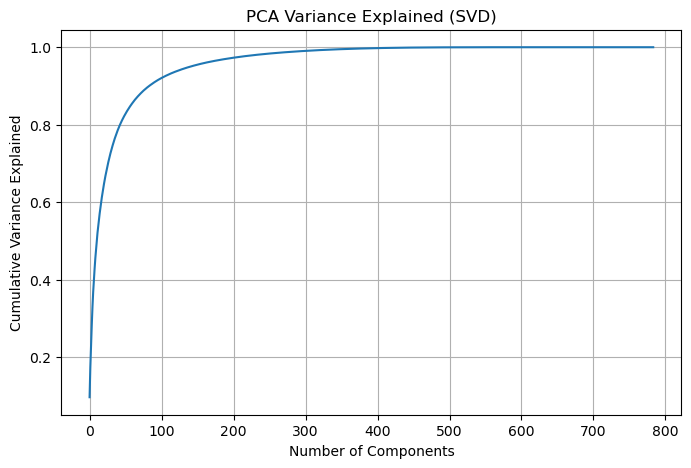

In [52]:
eigenvalues = (S ** 2) / (X_centered.shape[0] - 1)
variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_ratio)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("PCA Variance Explained (SVD)")
plt.grid()
plt.show()

In [53]:
def pca_transform(X_centered, Vt, p):
    W = Vt[:p].T          # (784 × p)
    Z = X_centered @ W   # Projection
    return Z, W


In [54]:
def reconstruct(Z, W, mean_X):
    X_recon = Z @ W.T + mean_X
    return np.clip(X_recon, 0, 1)

In [55]:
p_values = [50, 250, 500]
reconstructed_images = {}

for p in p_values:
    Z, W = pca_transform(X_centered, Vt, p)
    X_recon = reconstruct(Z, W, mean_X)
    reconstructed_images[p] = X_recon

In [56]:
def show_images(original, reconstructed_images, p):
    plt.figure(figsize=(8,3))

    for i in range(5):
        # Original
        plt.subplot(2, 5, i + 1)
        plt.imshow(original[i].reshape(28,28),
                   cmap='gray', vmin=0, vmax=1)
        plt.axis('off')

        # Reconstructed
        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructed_images[p][i].reshape(28,28),
                   cmap='gray', vmin=0, vmax=1)
        plt.axis('off')

    plt.suptitle(f"Original (Top) vs Reconstructed (Bottom), p={p}")
    plt.show()


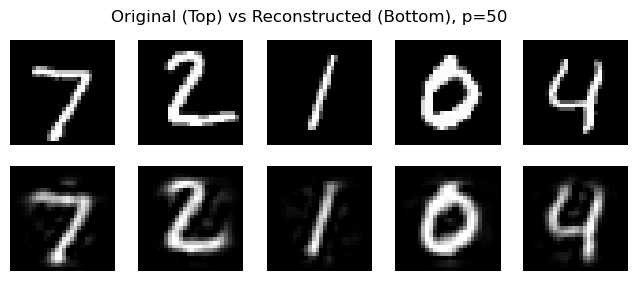

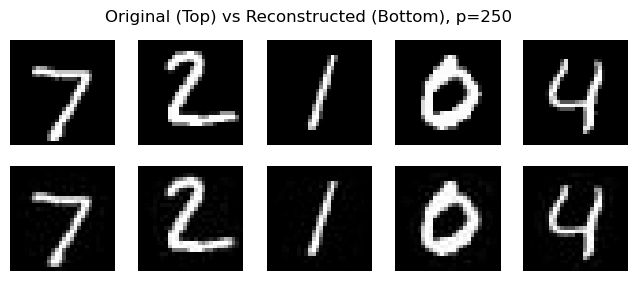

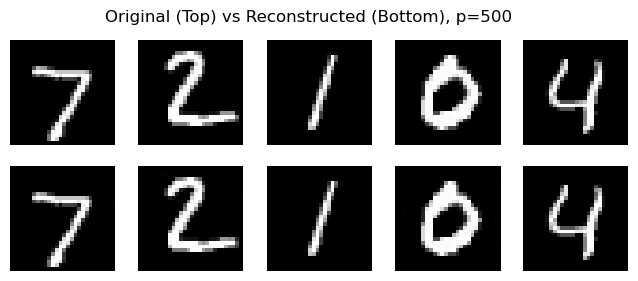

In [57]:
for p in p_values:
    show_images(X, reconstructed_images, p)

In [58]:
def psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(1.0 / np.sqrt(mse))

In [59]:
np.random.seed(42)
indices = np.random.choice(2000, 5, replace=False)

for p in p_values:
    print(f"\nPSNR values for p = {p}")
    for i in indices:
        print(f"Image {i}: {psnr(X[i], reconstructed_images[p][i]):.2f} dB")


PSNR values for p = 50
Image 1860: 21.21 dB
Image 353: 19.43 dB
Image 1333: 22.62 dB
Image 905: 18.95 dB
Image 1289: 20.64 dB

PSNR values for p = 250
Image 1860: 35.06 dB
Image 353: 29.84 dB
Image 1333: 30.61 dB
Image 905: 29.77 dB
Image 1289: 33.76 dB

PSNR values for p = 500
Image 1860: 58.38 dB
Image 353: 52.98 dB
Image 1333: 52.68 dB
Image 905: 48.29 dB
Image 1289: 58.88 dB


In [ ]:
## to check the PSNR values
for p in [50, 250, 500]:
    print(f"p={p}, PSNR:", psnr(X[0], reconstructed_images[p][0]))

p=50, PSNR: 20.863622892941986
p=250, PSNR: 31.638827631562684
p=500, PSNR: 52.58470383949552
